In [64]:
import tkinter as tk
from tkinter import * # for GUI interface 
from tkinter import messagebox # display error messages 
from PIL import ImageTk, Image  # for image display 
from tkinter import filedialog
from tkinter.filedialog import askopenfile
import cv2
from PIL import Image, ImageDraw,ImageFont,ImageFilter

# YOLO class


In [86]:
import torch
import random
from PIL import Image, ImageDraw,ImageFont,ImageFilter
import matplotlib.pyplot as plt
import numpy as np

class YOLOV5Model:
    def __init__(self) -> None:
        self.yoloPath='yolov5-master'
        self.model=None
        self.inferSizeValue=640       
    def loadModel(self,modelPath='D:\\deep\\yolov5-master\\best.pt'):
        self.modelPath=modelPath        
        try:
            self.model = torch.hub.load(self.yoloPath, 'custom', path=self.modelPath, source='local',force_reload=True)  # local repo 
            self.classnames = self.model.module.names if hasattr(self.model, 'module') else self.model.names
            return True, ''
        except Exception as e:
            return False, e
    def inferImage(self,img,infSize=640,conf=0.025,iou=0.45):
        infSize=self.inferSizeValue
        self.model.iou=iou
        self.model.conf=conf
        results = self.model(img,size=infSize)  # includes NMS   
        boxes = results.pandas().xyxy[0] 

        bboxes=[]
        for index, row in boxes.iterrows():
            xyxy=[row['xmin'],row['ymin'],row['xmax'],row['ymax'],row['name'], row['confidence'],row['class']]
            bboxes.append(xyxy)  

        results.show(labels=True)
        
        return results.ims[0], bboxes, results
    
    def calculate_bill(self,img,infSize=640,conf=0.025,iou=0.45):
        infSize=self.inferSizeValue
        self.model.iou=iou
        self.model.conf=conf
        results = self.model(img,size=infSize)  # includes NMS   
        TOTAL=0
        for i in results.pandas().xyxy[0]['class']:
            if i == 1: # pencil
                TOTAL+=10
            elif i==0:# erasor
                TOTAL+=5
            elif i==3: # sharpner
                TOTAL+=5
            else: # scale
                TOTAL+=15

        return TOTAL

model = YOLOV5Model()
model.loadModel()

YOLOv5  2022-11-26 Python-3.9.12 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients
Adding AutoShape... 


(True, '')

# Interface of the Stationery using tkinter

In [87]:
def upload_file():
    global img
    f_types = [('Jpg Files', '*.jpeg')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    pillowIm=Image.open(filename)
    bill=model.calculate_bill(pillowIm)
    img1, b, c=model.inferImage(pillowIm)
    #display the selected image
    img=Image.open(filename)
    img_resized=img.resize((250,150)) # new width & height of the images
    img=ImageTk.PhotoImage(img_resized)
    b2 = Button(root , image=img)
    my_canvas.create_window(200,90, anchor = "nw" , window = b2)
    
      #display the selected image
 
    # Result Display
    my_canvas.create_text((250, 250),text= "Total Bill" , font=("Helvetica" ,14,'bold') , anchor="nw" ,fill = "Black")
    text = my_canvas.create_text((350, 250),text= bill , font=("Helvetica" , 14) , anchor="nw" ,fill = "Black")
    # Get the bounding box of text
    bbox = my_canvas.bbox(text)
    # Outline the canvas text
    my_canvas.create_rectangle(bbox, outline="black")
    


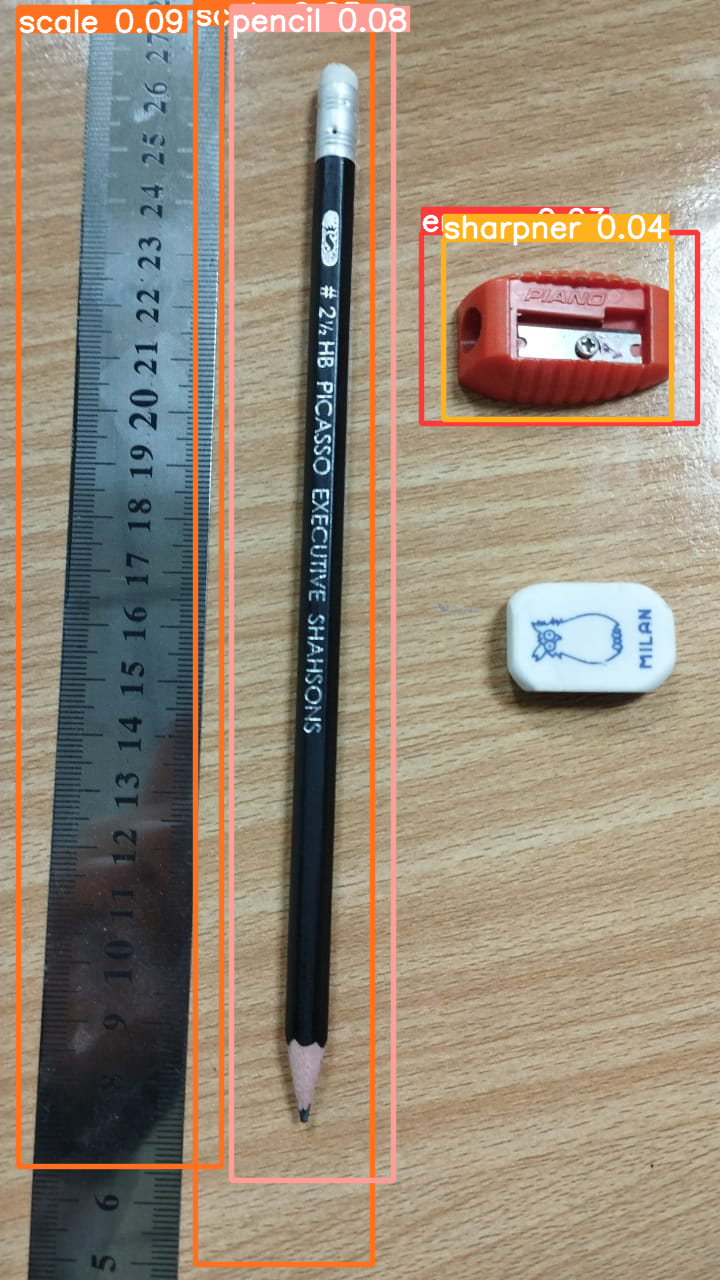

In [ ]:
root = Tk() # instance for GUI interface
root.title(" Block Chain through Python")  # change window caption 
root.geometry('510x340')            # window size 

#=========================
# Define backgroung image
#=========================
bg = PhotoImage(file= 'img.gif' ,  master=root) # Background Image ( should be in " .gif" and (800 X 500) image size ) 
# Create a canvas
my_canvas = Canvas(root , width = 1000 , height = 630)
my_canvas.pack(fill="both", expand = True)
# set image in canvas
my_canvas.create_image(0,0,image=bg , anchor="nw") # set image in the window


# labels and button
my_canvas.create_text((100, 20),text= "Stationery Billing Calculation System" , font=("Helvetica" , 14) , anchor="nw" ,fill = "Black")
PicButton = Button(root , text= "Upload Picture to calulate bill"  , width=25, command =  lambda:upload_file())
my_canvas.create_window(200,50, anchor = "nw" , window = PicButton)
button_exit = Button(root,text = "Exit",bg='red' , command = root.destroy)
my_canvas.create_window(430,300, anchor = "nw" , window = button_exit)


root.mainloop()

